# 0 Import

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

import tp2_function as tp2

# 1. Data Analyse

In [2]:
data=pd.read_csv('PubMed-multi-label-dataset.csv',sep=',')
print(len(data))
data.head(3)

50000


,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0


In [3]:
labels = data.iloc[:, -14:]
print("count of number of 1 per Label")
labels.where(labels == 1).count()

count of number of 1 per Label


A    23263
B    46577
C    26453
D    31074
E    39202
F     8885
G    33609
H     6069
I     5595
J     5531
L     7503
M    21363
N    22919
Z     8049
dtype: int64

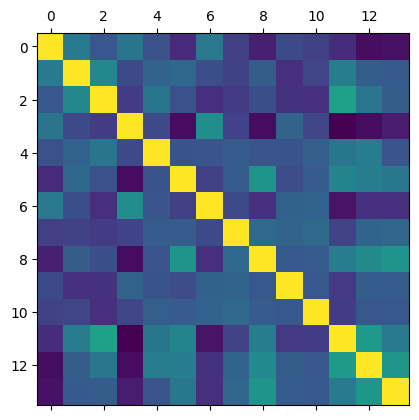

In [4]:
plt.matshow(labels.corr())

# 2. Modelisation

Pour modéliser notre problème d'apprentissage suppervisé, on défini notre plan d'attaque.

### Entrées

- abstractText 
- Potentiellement Title & meshMajor

### Sorties

- Les 14 labels

### Evaluations

- F1-score en raison du déséquilibre de la donnée.

### Approche

- Oversampling ou undersampling

# 3. Clean Data

- Pour notre corpus, nous utiliserons l'abstractText et le Title
- Nous enlevons les stop words et normalisons notre text
- Nous avons selectionner 3 données d'entré pour nos modèles:
  1. title
  2. abstractText
  3. abstractText + title (ici appellé corpus)
- Nous comparerons plus tard l'influance du choix de la donné d'entrée

In [5]:
title = data['Title'].astype(str)
title

0        Expression of p53 and coexistence of HPV in pr...
1        Vitamin D status in pregnant Indian women acro...
2        [Identification of a functionally important di...
3        Multilayer capsules: a promising microencapsul...
4        Nanohydrogel with N,N'-bis(acryloyl)cystine cr...
                               ...                        
49995    Five donors-one recipient: modeling a mosaic o...
49996    The role of eicosanoids in cyclosporine nephro...
49997    Impact of pancreaticoduodenal arcade dilation ...
49998    Outcomes of Preterm Infants following Discussi...
49999    Molecular subtyping of Borrelia burgdorferi se...
Name: Title, Length: 50000, dtype: object

In [6]:
abstractText = data['abstractText'].astype(str)
abstractText

0        Fifty-four paraffin embedded tissue sections f...
1        The present cross-sectional study was conducte...
2        The occurrence of individual amino acids and d...
3        In 1980, Lim and Sun introduced a microcapsule...
4        Substantially improved hydrogel particles base...
                               ...                        
49995    BACKGROUND: A 21-year-old man was admitted to ...
49996    Nephrotoxicity is the most troublesome complic...
49997    BACKGROUND: The aim of this study was to inves...
49998    OBJECTIVES: To describe the frequency of postn...
49999    Solitary lymphocytoma is a rare cutaneous mani...
Name: abstractText, Length: 50000, dtype: object

In [7]:
corpus = data['abstractText'].astype(str) + data['Title'].astype(str)
corpus

0        Fifty-four paraffin embedded tissue sections f...
1        The present cross-sectional study was conducte...
2        The occurrence of individual amino acids and d...
3        In 1980, Lim and Sun introduced a microcapsule...
4        Substantially improved hydrogel particles base...
                               ...                        
49995    BACKGROUND: A 21-year-old man was admitted to ...
49996    Nephrotoxicity is the most troublesome complic...
49997    BACKGROUND: The aim of this study was to inves...
49998    OBJECTIVES: To describe the frequency of postn...
49999    Solitary lymphocytoma is a rare cutaneous mani...
Length: 50000, dtype: object

In [8]:
title = tp2.clean_data(title)
title

0        express coexist hpv premalign lesion cervic ca...
1        vitamin statu pregnant indian women trimest di...
2        identif function import dipeptid sequenc atyp ...
3        multilay capsul promis microencapsul transplan...
4        nanohydrogel bi acryloyl cystin crosslink high...
                               ...                        
49995    donor recipi model mosaic granulocyt natur kil...
49996            role eicosanoid cyclosporin nephrotox rat
49997    impact pancreaticoduoden arcad dilat postop ou...
49998    outcom preterm infant follow discuss withdraw ...
49999    molecular subtyp borrelia burgdorferi sensu la...
Name: Title, Length: 50000, dtype: object

In [9]:
abstractText = tp2.clean_data(abstractText)
abstractText

0        paraffin embed tissu section patient dysplasia...
1        present cross section studi conduct determin v...
2        occurr individu amino acid dipeptid fragment s...
3        lim sun introduc microcapsul coat algin polyly...
4        substanti improv hydrogel particl base poli is...
                               ...                        
49995    background year old man admit hospit leukocyto...
49996    nephrotox troublesom complic cyclosporin csa t...
49997    background aim studi investig impact pancreati...
49998    object frequenc postnat discuss withdraw withh...
49999    solitari lymphocytoma rare cutan manifest lyme...
Name: abstractText, Length: 50000, dtype: object

In [10]:
corpus = tp2.clean_data(corpus)
corpus

0        paraffin embed tissu section patient dysplasia...
1        present cross section studi conduct determin v...
2        occurr individu amino acid dipeptid fragment s...
3        lim sun introduc microcapsul coat algin polyly...
4        substanti improv hydrogel particl base poli is...
                               ...                        
49995    background year old man admit hospit leukocyto...
49996    nephrotox troublesom complic cyclosporin csa t...
49997    background aim studi investig impact pancreati...
49998    object frequenc postnat discuss withdraw withh...
49999    solitari lymphocytoma rare cutan manifest lyme...
Length: 50000, dtype: object

# 4. Comparaison

## 4.1 function
- notre comparaison s'appuie sur la fonction run model présente dans [le tp2_function.py](./tp2_function.py)

In [11]:
base_estimator = {
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'MLP' : MLPClassifier(hidden_layer_sizes=(100, 100)),
}

## 4.2 Vecteur tfidf

In [12]:
tfidf, tfidf_dict = tp2.get_tfidf(corpus)
tfidf_dict

{'aa': 8.72875583085197,
 'aaa': 8.20888037156606,
 'aaaag': 11.12665110365034,
 'aaad': 11.12665110365034,
 'aaala': 11.12665110365034,
 'aaar': 11.12665110365034,
 'aab': 10.433503923090395,
 'aaba': 11.12665110365034,
 'aabb': 10.210360371776185,
 'aabd': 11.12665110365034,
 'aabo': 11.12665110365034,
 'aabr': 11.12665110365034,
 'aac': 9.622573706874066,
 'aacct': 11.12665110365034,
 'aacgcgcaac': 11.12665110365034,
 'aachen': 10.210360371776185,
 'aacn': 10.721185995542177,
 'aacr': 9.111748083108075,
 'aact': 10.721185995542177,
 'aactaac': 11.12665110365034,
 'aacu': 11.12665110365034,
 'aad': 9.622573706874066,
 'aada': 10.028038814982231,
 'aadb': 11.12665110365034,
 'aadt': 11.12665110365034,
 'aae': 11.12665110365034,
 'aaee': 11.12665110365034,
 'aael': 11.12665110365034,
 'aaf': 9.873888135154973,
 'aag': 9.421903011411915,
 'aagaatg': 11.12665110365034,
 'aaggg': 11.12665110365034,
 'aagl': 11.12665110365034,
 'aagpr': 11.12665110365034,
 'aagr': 11.12665110365034,
 'aags

In [13]:
tfidf_vec_title = title.apply(tp2.encode_tfidf, tfidf_dict=tfidf_dict, vector_size=10)
tfidf_vec_abstractText = abstractText.apply(tp2.encode_tfidf, tfidf_dict=tfidf_dict, vector_size=10)
tfidf_vec_corpus = corpus.apply(tp2.encode_tfidf, tfidf_dict=tfidf_dict, vector_size=10)

### 4.2.1 Premier essai

In [14]:
print("data 1: title")
tp2.run_model(tfidf_vec_title, labels, base_estimator)
print("data 2: abstractText")
tp2.run_model(tfidf_vec_abstractText, labels, base_estimator)
print("data 3: corpus")
tp2.run_model(tfidf_vec_corpus, labels, base_estimator)

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6450131754683608
f1 macro 0.393610422919597
0/1 loss 0.98484
----------ClassifierChain----------
f1 micro 0.6448501822229403
f1 macro 0.39806526160432437
0/1 loss 0.98264
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6377550836360488
f1 macro 0.397414502922496
0/1 loss 0.9902
----------ClassifierChain----------
f1 micro 0.615716887591107
f1 macro 0.4130259099532204
0/1 loss 0.98096
data 2: abstractText
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6473955517104647
f1 macro 0.39680487951234716
0/1 loss 0.98368
----------ClassifierChain----------
f1 micro 0.6476331487918974
f1 macro 0.4042399477275766
0/1 loss 0.98228
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6502021227307612
f1 macro 0.41082166368003664
0/1 loss 0.9894
----------Cl

**F1_score micro**
| **Data**         | **KNN MOC** | **KNN CHAIN** | **MLP MOC** | **MLP CHAIN** |
|------------------|-------------|----------------|-------------|----------------|
| **title**        | **0.6449828736253831** | 0.6444060407015934 | 0.6388423414467892 | 0.603646749949511 |
| **abstractText** | 0.648485197557885  | **0.6490044465079734**  | 0.6459925576069844  | 0.6256032295435   |
| **corpus**       | 0.6463028872278942 | **0.6482642022249885**  | 0.6470776746736553  | 0.6300634029145057 |

**F1_score macro**
| **Data**         | **KNN MOC** | **KNN CHAIN** | **MLP MOC** | **MLP CHAIN** |
|------------------|-------------|----------------|-------------|----------------|
| **title**        | 0.3945498937952788 | 0.4000097769559305 | 0.4091529706725497 | **0.4105476011305665** |
| **abstractText** | 0.3982360713591976 | 0.40536415332451925 | 0.40518797671456114 | **0.42039704553198093** |
| **corpus**       | 0.3956818094751971 | 0.40512645503964356 | 0.4079259316220893  | **0.42738669024140075** |

**Zero_one_loss**
| **Data**         | **KNN MOC** | **KNN CHAIN** | **MLP MOC** | **MLP CHAIN** |
|------------------|-------------|----------------|-------------|----------------|
| **title**        | 0.98532     | 0.9824         | **0.98936**     | 0.9844         |
| **abstractText** | 0.98428     | 0.98156        | **0.98676**     | 0.98072        |
| **corpus**       | 0.98468     | 0.98292        | **0.989**       | 0.9832         |


32min42s de run

## 4.3 SVD Concepts

In [15]:
tfidf_vec_title_matrix = np.array(tfidf_vec_title.tolist())
tfidf_vec_title_matrix

array([[ 2.9848789 ,  6.71385281,  7.10129941, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.77954357,  4.20795588,  5.77954357, ...,  5.86655495,
         3.31326167,  5.47065929],
       [ 4.55857319,  2.82067289,  3.07642615, ...,  4.63063055,
         0.        ,  0.        ],
       ...,
       [ 4.0295159 , 10.02803881,  9.74035674, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.55904693,  6.67230381,  5.15666559, ...,  4.13088495,
         3.64396928,  0.        ],
       [ 3.9008058 ,  5.6628193 ,  8.68430407, ...,  2.17146108,
         7.17540739, 11.1266511 ]])

In [16]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
tfidf_vec_title_matrix = svd.fit_transform(tfidf_vec_title_matrix)
tfidf_vec_title_matrix

array([[13.52709104, -6.02600682,  0.78208568,  1.47175409,  2.23541403],
       [15.86730084,  1.13741879, -1.50703689,  1.15206029, -0.05417008],
       [13.38851283, -1.69134144,  4.52589859, -0.87398579,  1.52252176],
       ...,
       [16.2058676 , -6.11421614,  1.17671976, -2.6368362 ,  1.56067025],
       [14.60017065,  0.36519307,  3.81625439, -2.96635146, -0.93409741],
       [21.41033627,  2.94484843, -3.33052304,  8.17002306, -0.35295079]])

In [17]:
print("data 1: title")
tp2.run_model(tfidf_vec_title_matrix, labels, base_estimator)

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6431210637820953
f1 macro 0.38796331527140754
0/1 loss 0.98592
----------ClassifierChain----------
f1 micro 0.6364348720013228
f1 macro 0.3980774456833728
0/1 loss 0.97848
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6721016395461279
f1 macro 0.3731146350544353
0/1 loss 0.97616
----------ClassifierChain----------
f1 micro 0.6369366598443381
f1 macro 0.39345501804629013
0/1 loss 0.9693799999999999
